"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as pe
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Handling

In [3]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [4]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [5]:
df['NumberOfTrips'].value_counts()

NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

In [6]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [7]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

changing Fe male to female and single to unmarried

In [8]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
# Imputing values
df.Age.fillna(df['Age'].mean(),inplace=True)
df.TypeofContact.fillna(df['TypeofContact'].mode()[0],inplace=True)
df.DurationOfPitch.fillna(df['DurationOfPitch'].median(),inplace=True)
df.NumberOfFollowups.fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df.NumberOfTrips.fillna(df['NumberOfTrips'].mode()[0],inplace=True)
df.NumberOfChildrenVisiting.fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)
df.MonthlyIncome.fillna(df['MonthlyIncome'].median(),inplace=True)

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID',inplace=True,axis=1)

In [15]:
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [16]:
num_features=[features for features in df.columns if df[features].dtype!=object]
print("Number of numberical features", num_features)

Number of numberical features ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [17]:
cat_features=[features for features in df.columns if df[features].dtype==object]
print("Number of categorical Features",cat_features)

Number of categorical Features ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [18]:
dicreate_features=[features for features in df.columns if len(df[features].unique())<=25]
print("Discrete features", dicreate_features)

Discrete features ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'TotalVisiting']


In [19]:
continuous_features=[features for features in df.columns if features not in dicreate_features]
print("continuous Features", continuous_features)

continuous Features ['Age', 'DurationOfPitch', 'MonthlyIncome']


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [21]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [24]:
# applying column transformer
cat_feature=X.select_dtypes(include='object').columns
num_feature=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ('StandardScaler',numeric_tranformer,num_feature)
        
    ]
)

In [25]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [26]:
X_train=preprocessor.fit_transform(X_train)


In [27]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [28]:

X_test=preprocessor.transform(X_test)

In [29]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

In [30]:
# apply training
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,roc_curve

In [31]:
models={
    "Logistic regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "decision tree": DecisionTreeClassifier()
}
for i in range( len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    # prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # performance matrices
    model_train_acc=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)

    # performace on test data

    model_test_acc=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model's Training accuracy",model_train_acc)
    print("Model's training F1 score",model_train_f1)
    print('Models trainning Recall score',model_train_recall )
    print("Model's trainning precision score", model_train_precision)
    print("Model's trainning ROC AUC score", roc_auc_score)


    print("______________________________________________________________")

    print("Model's test accuracy",model_test_acc)
    print("Model's test F1 score",model_test_f1)
    print('Models test Recall score',model_test_recall )
    print("Model's test precision score", model_test_precision)
    print("Model's test ROC AUC score", model_test_roc_auc)


    print("-"*40)
    print('\n')


Logistic regression
Model's Training accuracy 0.8462915601023018
Model's training F1 score 0.8207861020622609
Models trainning Recall score 0.3058984910836763
Model's trainning precision score 0.7012578616352201
Model's trainning ROC AUC score <function roc_auc_score at 0x00000201C39949A0>
______________________________________________________________
Model's test accuracy 0.83640081799591
Model's test F1 score 0.8086633047343356
Models test Recall score 0.2931937172774869
Model's test precision score 0.691358024691358
Model's test ROC AUC score 0.630713758257549
----------------------------------------


Random Forest
Model's Training accuracy 1.0
Model's training F1 score 1.0
Models trainning Recall score 1.0
Model's trainning precision score 1.0
Model's trainning ROC AUC score <function roc_auc_score at 0x00000201C39949A0>
______________________________________________________________
Model's test accuracy 0.9304703476482618
Model's test F1 score 0.9254825292231563
Models test Recal

In [32]:
params={"max_depth":[5,8,15,None,10],
        "max_features":[5,7,"auto",8],
        "min_samples_split":[2,8,15,20],
        "n_estimators":[100,200,500,1000]}



In [33]:
params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [34]:
random_cv=[
    ('RF',RandomForestClassifier(),params),
]

In [35]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name, model ,params in random_cv:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name]=random.best_params_

for model_name in model_params:
    print(f"---------------------------------------best Pramas for {model_name}___________")
    print(model_params[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------------------------best Pramas for RF___________
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [39]:
model={
    "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=7,max_depth=None)

}

for i in range( len(list(model))):
    models=list(model.values())[i]
    models.fit(X_train,y_train)

    # prediction
    y_train_pred=models.predict(X_train)
    y_test_pred=models.predict(X_test)

    # performance matrices
    model_train_acc=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)

    # performace on test data

    model_test_acc=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)

    print(list(model.keys())[i])

    print("Model's Training accuracy",model_train_acc)
    print("Model's training F1 score",model_train_f1)
    print('Models trainning Recall score',model_train_recall )
    print("Model's trainning precision score", model_train_precision)
    print("Model's trainning ROC AUC score", roc_auc_score)


    print("______________________________________________________________")

    print("Model's test accuracy",model_test_acc)
    print("Model's test F1 score",model_test_f1)
    print('Models test Recall score',model_test_recall )
    print("Model's test precision score", model_test_precision)
    print("Model's test ROC AUC score", model_test_roc_auc)


    print("-"*40)
    print('\n')

Random Forest
Model's Training accuracy 1.0
Model's training F1 score 1.0
Models trainning Recall score 1.0
Model's trainning precision score 1.0
Model's trainning ROC AUC score <function roc_auc_score at 0x00000201C39949A0>
______________________________________________________________
Model's test accuracy 0.9376278118609407
Model's test F1 score 0.9336198083274467
Models test Recall score 0.7015706806282722
Model's test precision score 0.9710144927536232
Model's test ROC AUC score 0.848244044253145
----------------------------------------




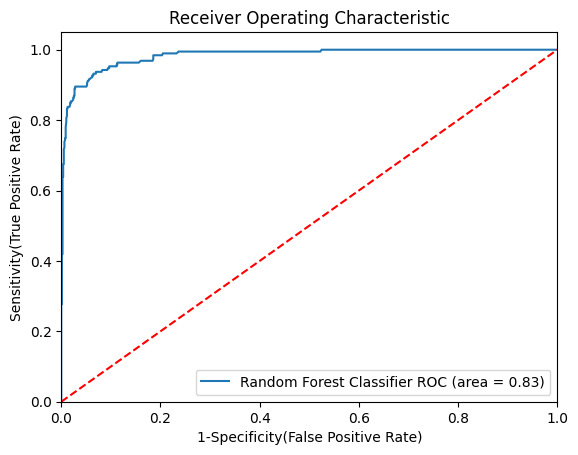

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 